In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Anomaly Detection: Continuous probabilistic methods exercises

## 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [11]:
def get_lower_and_upper_bounds(series, multiplier = 1.5):
    q1 = np.quantile(series, .25)
    q3 = np.quantile(series, .75)
    iqr = q3 - q1
    lower = q1 - (multiplier * iqr)
    upper = q3 + (multiplier * iqr)
    return lower, upper

# 1. Using lemonade.csv dataset and focusing on continuous variables:

### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [32]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [27]:
df[df.Temperature < get_lower_and_upper_bounds(df.Temperature)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


<AxesSubplot:>

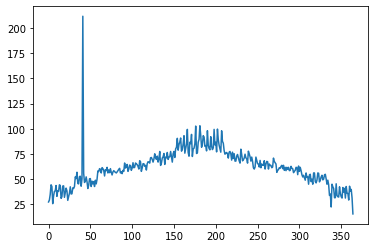

In [33]:
df.Temperature.plot()

This lower outlier for temperature makes sense and should be kept.

In [28]:
df[df.Rainfall < get_lower_and_upper_bounds(df.Rainfall)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No lower outliers for Temperature

In [29]:
df[df.Flyers < get_lower_and_upper_bounds(df.Flyers)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


<AxesSubplot:>

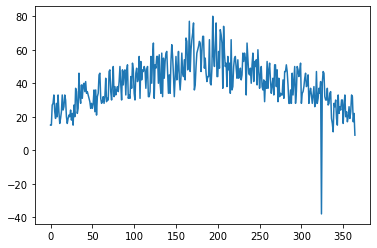

In [34]:
df.Flyers.plot()

This lower outlier does NOT make sense as you can have a negative number of flyers. Either it should be changed to a positive number instead of a negative (likely wrongly entered data) or it should be dropped.

In [30]:
df[df.Price < get_lower_and_upper_bounds(df.Price)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [31]:
df[df.Sales < get_lower_and_upper_bounds(df.Sales)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No lower outliers for either Price or Sales.

### Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [36]:
df[df.Temperature > get_lower_and_upper_bounds(df.Temperature)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


This upper outlier does NOT makes sense as there is no way a temperature reading on the surface of the Earth for a habitable human location was 212 degrees. This data should not be kept.

In [37]:
df[df.Rainfall > get_lower_and_upper_bounds(df.Rainfall)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


<AxesSubplot:>

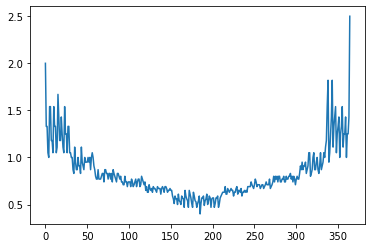

In [38]:
df.Rainfall.plot()

Based on this graph and data, the rainfall numbers while outliers are still valid data and should be included.

In [39]:
df[df.Flyers > get_lower_and_upper_bounds(df.Flyers)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


<AxesSubplot:>

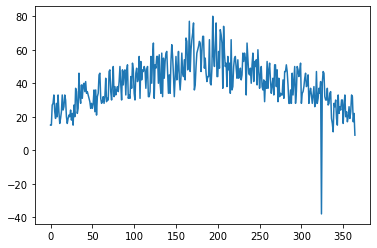

In [40]:
df.Flyers.plot()

Based on this graph and data, the Flyers numbers while outliers are still valid data and should be kept.

In [41]:
df[df.Price > get_lower_and_upper_bounds(df.Price)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [42]:
df[df.Sales > get_lower_and_upper_bounds(df.Sales)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


<AxesSubplot:>

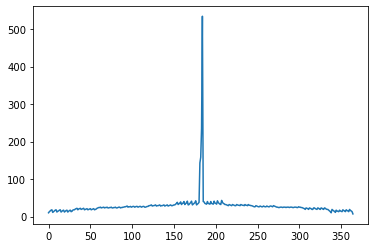

In [43]:
df.Sales.plot()

It's hard to determine whether this is anomalous and valid or anomalous and wrong. I can think of scenarios where a child sells lemonade everyday for a year in her neighborhood and she only normally sells a small amount, but once a year there is a Independence Day Fair/Carnival where she sees gigantic increases in sales due to a massive influx of interested buyers. 

This is just one scenario; it's really hard to say if this is valid or not valid without having some domain knowledge of the situation.

### Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [44]:
df[df.Temperature < get_lower_and_upper_bounds(df.Temperature, multiplier=3)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No lower outliers for Temperature present when using a multiplier of 3

In [46]:
df[df.Rainfall < get_lower_and_upper_bounds(df.Rainfall, multiplier=3)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No lower outliers for Rainfall present when using a multiplier of 3

In [47]:
df[df.Flyers < get_lower_and_upper_bounds(df.Flyers, multiplier=3)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


This lower outlier doesn't make sense and should not be kept (no such thing as having a negative amount of a physical object)

In [49]:
df[df.Price < get_lower_and_upper_bounds(df.Price, multiplier=3)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [50]:
df[df.Sales < get_lower_and_upper_bounds(df.Sales, multiplier=3)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No lower outliers for Price and Sales when using a multiplier of 3.

### Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [51]:
df[df.Temperature > get_lower_and_upper_bounds(df.Temperature, multiplier=3)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


This upper outlier doesn't makes sense since 212 degrees is beyond human livable conditions.

In [52]:
df[df.Rainfall > get_lower_and_upper_bounds(df.Rainfall, multiplier=3)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


These upper outliers are fine and should be kept

In [53]:
df[df.Flyers > get_lower_and_upper_bounds(df.Flyers, multiplier=3)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [54]:
df[df.Price > get_lower_and_upper_bounds(df.Price, multiplier=3)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No upper outliers for Flyers or Price when multiplier is 3

In [55]:
df[df.Sales > get_lower_and_upper_bounds(df.Sales, multiplier=3)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


These are the same outliers as above when using a multiplier of 1.5. My comment still holds that we need more domain knowledge before we can decide if this data should be dropped or kept.

# 2.Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

Use a 2 sigma decision rule to isolate the outliers.

Do these make sense?
Should certain outliers be kept or removed?

<AxesSubplot:ylabel='Frequency'>

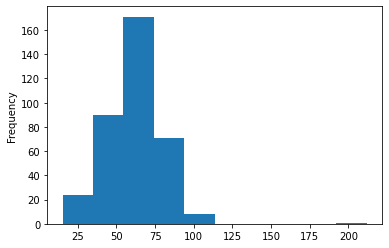

In [56]:
df.Temperature.plot(kind = 'hist')

Temperature looks more or less normally distributed.

In [58]:
zscores = pd.Series((df.Temperature - df.Temperature.mean()) / df.Temperature.std())
df[zscores > 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
166,6/16/17,Friday,99.3,0.47,77,0.5,41
176,6/26/17,Monday,102.6,0.47,60,0.5,42
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
190,7/10/17,Monday,98.0,0.49,66,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
202,7/22/17,Saturday,99.6,0.47,49,0.5,42
207,7/27/17,Thursday,97.9,0.47,74,0.5,43


These upper outliers for Temperature all make sense and should be kept except for the entry which lists Temperature as 212 degrees which should be dropped as nonsense.

In [60]:
df[zscores < -2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


These lower outliers for Temperature make sense and should be kept.

<AxesSubplot:ylabel='Frequency'>

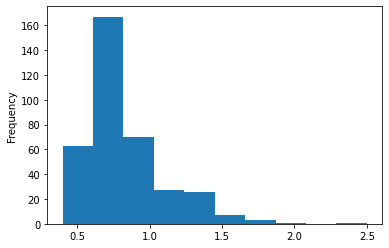

In [62]:
df.Rainfall.plot(kind = 'hist')

Rainfall looks relatively normal with some right skew.

In [63]:
zscores = pd.Series((df.Rainfall - df.Rainfall.mean()) / df.Rainfall.std())
df[zscores > 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14
19,1/20/17,Friday,31.6,1.43,20,0.5,12
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12
337,12/4/17,Monday,34.9,1.54,16,0.5,13
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10


These upper outliers for Rainfall look fine, just depict normally heavy rain days. They should be kept.

In [66]:
df[zscores < -2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No lower outliers for Rainfall here.

<AxesSubplot:ylabel='Frequency'>

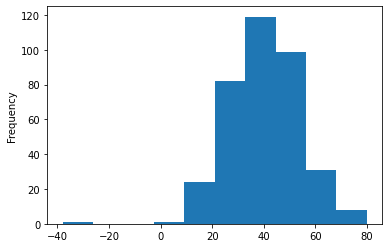

In [68]:
df.Flyers.plot(kind = 'hist')

Flyers is pretty normally distributed.

In [70]:
zscores = pd.Series((df.Flyers - df.Flyers.mean()) / df.Flyers.std())
df[zscores > 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
194,7/14/17,Friday,92.0,0.50,80,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
203,7/23/17,Sunday,89.1,0.51,72,0.5,37
204,7/24/17,Monday,83.5,0.57,69,0.5,35
207,7/27/17,Thursday,97.9,0.47,74,0.5,43


The upper outliers for Flyers seems fine and should be kept.

In [72]:
df[zscores < -2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


The lower outliers for Flyers are alright except for the entry where a negative value for numer of Flyers is given. This entry should be dropped, others kept.

<AxesSubplot:ylabel='Frequency'>

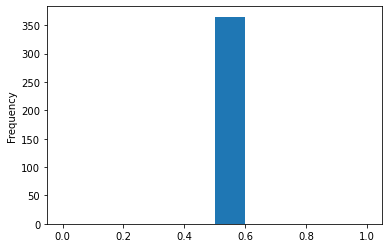

In [73]:
df.Price.plot(kind = 'hist')

Price is not normally distributed.

<AxesSubplot:ylabel='Frequency'>

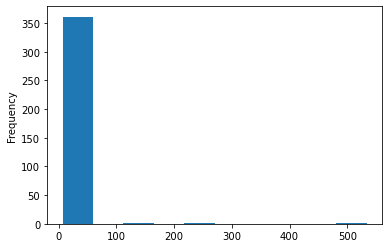

In [74]:
df.Sales.plot(kind = 'hist')

Sales is also not normally distributed.

# 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

Based on the previous graphs, I will do 3 sigma rules for Temperature, Rainfall, and Flyers as they are normally distributed.

In [76]:
zscores = pd.Series((df.Temperature - df.Temperature.mean()) / df.Temperature.std())
df[zscores > 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [77]:
df[zscores < -3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [79]:
zscores = pd.Series((df.Rainfall - df.Rainfall.mean()) / df.Rainfall.std())
df[zscores > 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
15,1/16/17,Monday,30.6,1.67,24,0.5,12
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [80]:
df[zscores < -3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [81]:
zscores = pd.Series((df.Flyers - df.Flyers.mean()) / df.Flyers.std())
df[zscores > 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [82]:
df[zscores < -3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20
